# Project 2 - Ames Housing Data and Kaggle Challenge

**Imports:**

In [1]:
import pandas as pd
#https://datascienceparichay.com/article/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics 

**Functions:**

In [2]:
def regress_metrics(y_test, y_preds, samp_size):
    
    MAE = metrics.mean_absolute_error(y_test, y_preds)
    
    SSE = np.sum((y_test - y_preds) ** 2)
    
    MSE = metrics.mean_squared_error(y_test, y_preds)
    
    RMSE = np.sqrt(MSE)
    
    r2 = metrics.r2_score(y_test, y_preds)
    
    return [{'MAE' : MAE,
            'SSE' : SSE, 
            'MSE' : MSE, 
            'RMSE' : RMSE,
            'r2' : r2}]

**Reading in the Data:**

In [3]:
#reading in training and testing data
ames_df = pd.read_csv('./datasets/train.csv')
ames_test_df = pd.read_csv('./datasets/test.csv')

In [4]:
#getting an idea of the shape and columns in next four codelines:
ames_df.shape

(2051, 81)

In [5]:
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
ames_test_df.shape

(878, 80)

In [7]:
ames_test_df.head()

#ames_test_df is missing the 'SalePrice' column

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
#listing all columns for ames_df: 
ames_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
ames_df.isna().sum().sort_values(ascending = False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
SalePrice          0
Length: 81, dtype: int64

In [10]:
#renaming columns to preferred nomenclature 
ames_df.columns = ames_df.columns.str.strip().str.lower()
ames_df.columns = ames_df.columns.str.replace(' ', '_')
ames_df.columns[:5]

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')

In [11]:
#doing the same thing to our testing data:
ames_test_df.columns = ames_test_df.columns.str.strip().str.lower()
ames_test_df.columns = ames_test_df.columns.str.replace(' ', '_')
ames_test_df.columns[:5]

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')

In [12]:
#null/baseline model: 
round(ames_df['saleprice'].mean(), 2) 
#The average cost of a home in Ames is $181469.70. 

181469.7

In [13]:
round(ames_df['saleprice'].median(), 2) 
#The median cost of a home in Ames is $162500.00. 
#This was used as the original baseline submission in Kaggle.

162500.0

**What features to consider?**

In [14]:
#Before I begin any Data Cleaning and EDA I'm going to cut down the list of features,
#considering a shorter list of features at the outset. This is done using my domain knowledge.

most_features = ['ms_zoning', 'lot_frontage', 'lot_area',
            'street', 'alley', 'utilities', 'neighborhood', 
            'condition_1', 'condition_2', 'bldg_type', 'house_style', 
            'overall_qual', 'overall_cond', 'year_built', 'year_remod/add',
            'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
            'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond',
            'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'total_bsmt_sf',
            'heating', 'heating_qc', 'central_air', '1st_flr_sf',
            '2nd_flr_sf','gr_liv_area', 'bsmt_full_bath','bsmt_half_bath',
            'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 
            'kitchen_qual', 'totrms_abvgrd', 'fireplaces', 'fireplace_qu',
            'garage_yr_blt', 'garage_finish', 'garage_area', 'garage_qual',
            'garage_cond', 'paved_drive', 'pool_area', 'pool_qc']

df_most_feat = ames_df[most_features]
df_most_feat.head(3)

#cut about thirty columns off
#in the end I never used my 'most_features' list

,ms_zoning,lot_frontage,lot_area,street,alley,utilities,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,total_bsmt_sf,heating,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,pool_area,pool_qc
0,RL,NaN,13517,Pave,NaN,AllPub,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,725.0,GasA,Ex,Y,725,754,1479,0.0,0.0,2,1,3,1,Gd,6,0,NaN,1976.0,RFn,475.0,TA,TA,Y,0,NaN
1,RL,43.0,11492,Pave,NaN,AllPub,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,913.0,GasA,Ex,Y,913,1209,2122,1.0,0.0,2,1,4,1,Gd,8,1,TA,1997.0,RFn,559.0,TA,TA,Y,0,NaN
2,RL,68.0,7922,Pave,NaN,AllPub,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,1057.0,GasA,TA,Y,1057,0,1057,1.0,0.0,1,0,3,1,Gd,5,0,NaN,1953.0,Unf,246.0,TA,TA,Y,0,NaN


In [15]:
#Let's chop off some more:
some_features = ['lot_frontage', 'lot_area', 'street', 'utilities', 
            'condition_1', 'bldg_type', 'overall_qual', 'overall_cond', 
            'year_built', 'year_remod/add', 'exterior_1st', 'exter_qual',
            'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
            'total_bsmt_sf', 'heating', 'heating_qc', '1st_flr_sf',
            '2nd_flr_sf', 'full_bath', 'half_bath', 'bedroom_abvgr', 
            'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'garage_yr_blt',
            'garage_area', 'garage_qual', 'garage_cond', 'paved_drive',
            'pool_area', 'pool_qc']

df_some_feat = ames_df[some_features]
df_some_feat.head(3)

,lot_frontage,lot_area,street,utilities,condition_1,bldg_type,overall_qual,overall_cond,year_built,year_remod/add,exterior_1st,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,total_bsmt_sf,heating,heating_qc,1st_flr_sf,2nd_flr_sf,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,garage_yr_blt,garage_area,garage_qual,garage_cond,paved_drive,pool_area,pool_qc
0,NaN,13517,Pave,AllPub,RRAe,1Fam,6,8,1976,2005,HdBoard,Gd,TA,TA,TA,No,725.0,GasA,Ex,725,754,2,1,3,1,Gd,6,1976.0,475.0,TA,TA,Y,0,NaN
1,43.0,11492,Pave,AllPub,Norm,1Fam,7,5,1996,1997,VinylSd,Gd,TA,Gd,TA,No,913.0,GasA,Ex,913,1209,2,1,4,1,Gd,8,1997.0,559.0,TA,TA,Y,0,NaN
2,68.0,7922,Pave,AllPub,Norm,1Fam,5,7,1953,2007,VinylSd,TA,Gd,TA,TA,No,1057.0,GasA,TA,1057,0,1,0,3,1,Gd,5,1953.0,246.0,TA,TA,Y,0,NaN


In [16]:
#And one big chop to be our starting point (after null submiussion to Kaggle):
least_features = ['lot_area', 'utilities', 'condition_1', 'overall_qual',
                'overall_cond', 'year_built', 'year_remod/add', 'exter_qual',
                'exter_cond', 'bsmt_qual', 'bsmt_cond', 'total_bsmt_sf',
                'heating', 'heating_qc', '1st_flr_sf', '2nd_flr_sf',
                'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
                'kitchen_qual', 'totrms_abvgrd']

df_least_feat = ames_df[least_features]
df_least_feat.head(3)

,lot_area,utilities,condition_1,overall_qual,overall_cond,year_built,year_remod/add,exter_qual,exter_cond,bsmt_qual,bsmt_cond,total_bsmt_sf,heating,heating_qc,1st_flr_sf,2nd_flr_sf,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd
0,13517,AllPub,RRAe,6,8,1976,2005,Gd,TA,TA,TA,725.0,GasA,Ex,725,754,2,1,3,1,Gd,6
1,11492,AllPub,Norm,7,5,1996,1997,Gd,TA,Gd,TA,913.0,GasA,Ex,913,1209,2,1,4,1,Gd,8
2,7922,AllPub,Norm,5,7,1953,2007,TA,Gd,TA,TA,1057.0,GasA,TA,1057,0,1,0,3,1,Gd,5


**Data Cleaning & EDA**

In [17]:
df_least_feat = df_least_feat.join(ames_df['saleprice'])

In [18]:
#sns.pairplot(df_least_feat);
#commented out for run-time

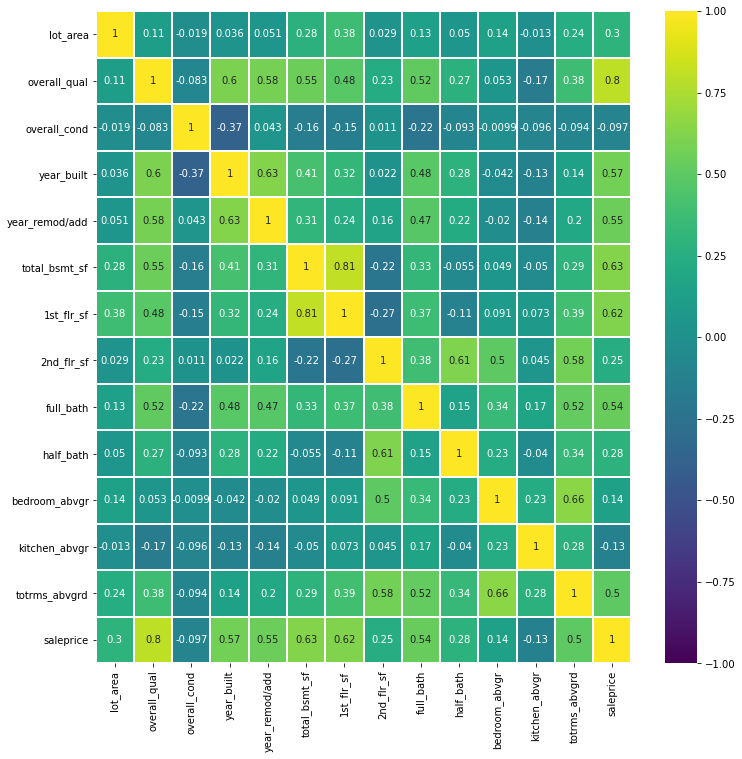

In [19]:
plt.figure(figsize = (12, 12))
sns.heatmap(df_least_feat.corr(),
            annot = True,
            linewidth = 1,
            vmin = -1,
            vmax = 1,
            cmap = 'viridis');

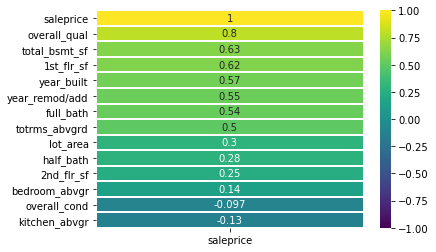

In [20]:
#top_corr = np.abs(ames_train.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)
sns.heatmap(df_least_feat.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            linewidths = 1,
            cmap='viridis');

- The above heatmap shows correlations between features in df_least_feat:
    - From df_least_feat the features: overall_qual, total_bsmt_sf, 1st_flr_sf, year_built, year_remod/add, full_bath, and totrms_abvgrd have the greatest positive impact on saleprice.
    - lot_area, half_bath, 2nd_flr_sf, and bedroom_abvgr have a positive impact but much less of one than the above features.</br>
</br>
- As each of the three features total_bsmt_sf, 1st_flr_sf, and 2nd_flr_sf have a positive correlation with saleprice, I'm going to make an interaction feature that's </br> 'total_sf' = total_bsmt_sf + 1st_flr_sf + and 2nd_flr_sf 

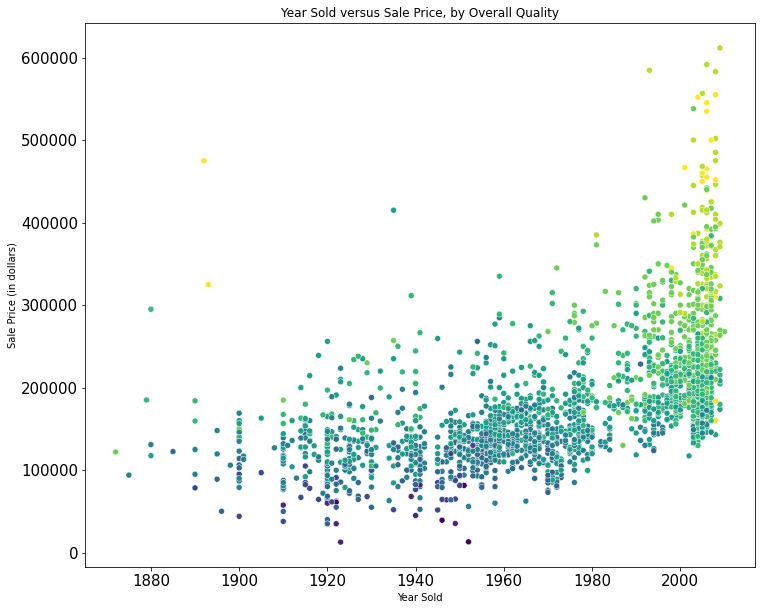

In [22]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x = df_least_feat['year_built'], y = df_least_feat['saleprice'], c = df_least_feat['overall_qual'])
plt.title('Year Sold versus Sale Price, by Overall Quality')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price (in dollars)')
plt.tick_params(labelsize=15)
plt.show()

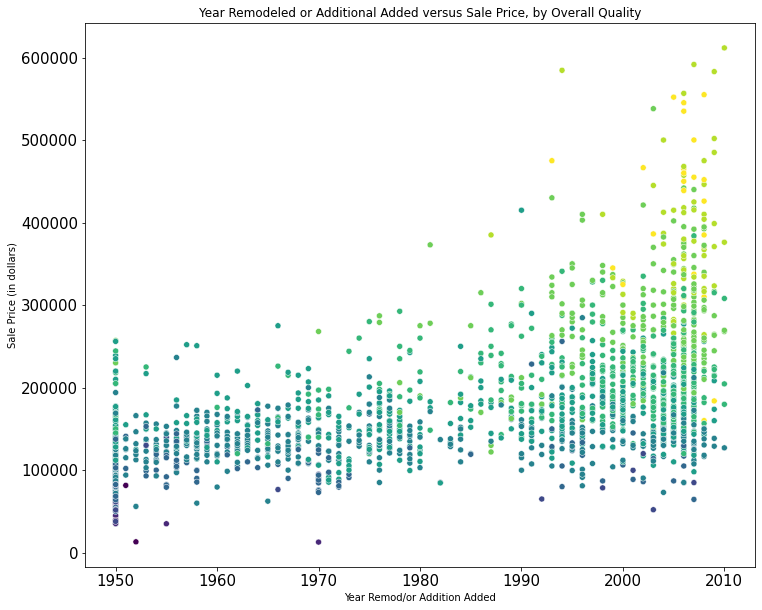

In [23]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x = df_least_feat['year_remod/add'], y = df_least_feat['saleprice'], c = df_least_feat['overall_qual'])
plt.title('Year Remodeled or Additional Added versus Sale Price, by Overall Quality')
plt.xlabel('Year Remod/or Addition Added')
plt.ylabel('Sale Price (in dollars)')
plt.tick_params(labelsize=15)
plt.show()

In [23]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html

#fig, ax = plt.subplots()
#scatter = ax.scatter(x = df_least_feat['lot_area'], y = df_least_feat['saleprice'], c = df_least_feat['overall_qual'])
#legend1 = ax.legend(*scatter.legend_elements(),
#                    loc = "best", title = "overall_qual")
#plt.title('Lot Size (Area) versus Sale Price, by Overall Quality')
#plt.xlabel('Lot Size (in square feet)')
#plt.ylabel('Sale Price (in dollars)')
#plt.show()

#try to make a bigger plot:

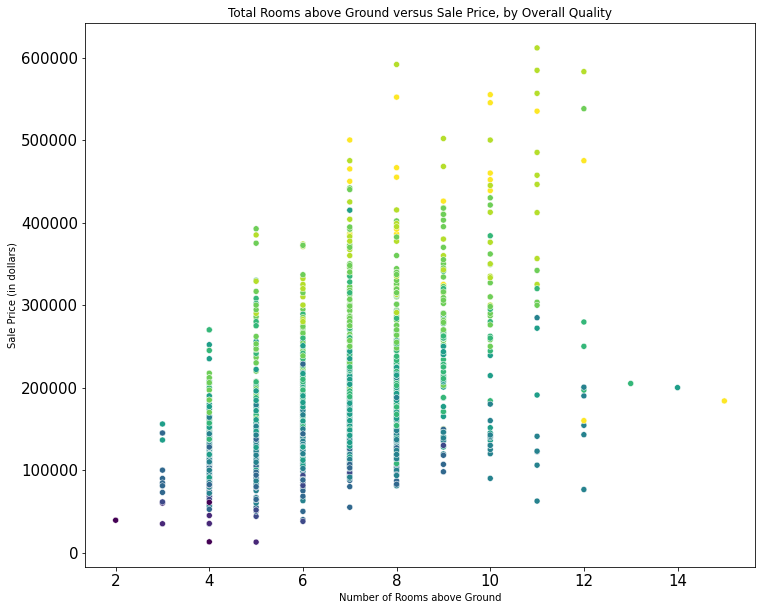

In [24]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x = df_least_feat['totrms_abvgrd'], y = df_least_feat['saleprice'], c = df_least_feat['overall_qual'])
plt.title('Total Rooms above Ground versus Sale Price, by Overall Quality')
plt.xlabel('Number of Rooms above Ground')
plt.ylabel('Sale Price (in dollars)')
plt.tick_params(labelsize=15)
plt.show()

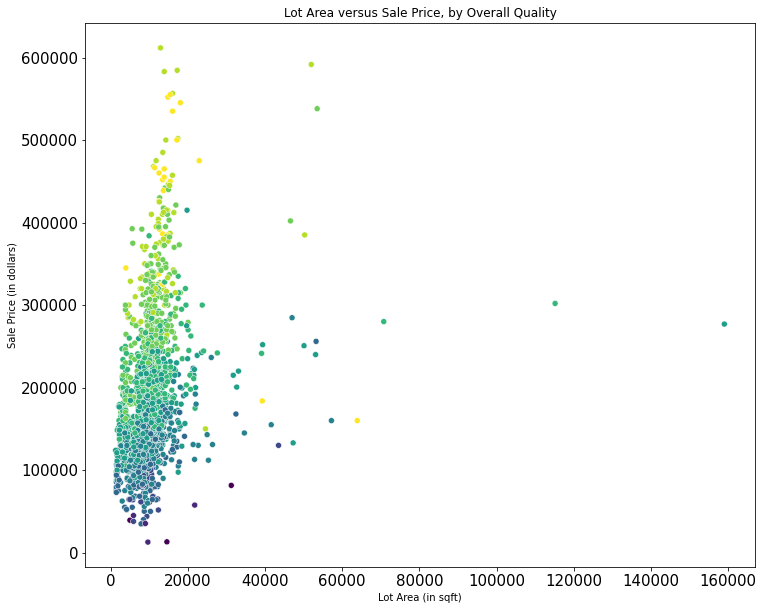

In [26]:
plt.figure(figsize = (12, 10))
sns.scatterplot(x = df_least_feat['lot_area'], y = df_least_feat['saleprice'], c = df_least_feat['overall_qual'])
plt.title('Lot Area versus Sale Price, by Overall Quality')
plt.xlabel('Lot Area (in sqft)')
plt.ylabel('Sale Price (in dollars)')
plt.tick_params(labelsize=15)
plt.show()

- NEED TO INTERPRET NEED TO INTERPRET

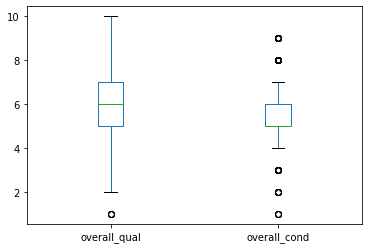

In [26]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
df_least_feat.boxplot(column = ['overall_qual', 'overall_cond'], grid = False);

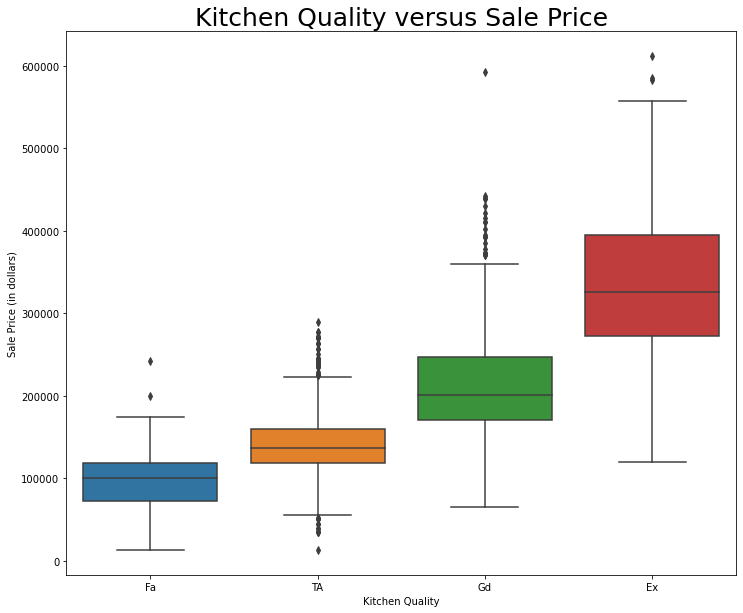

In [29]:
plt.figure(figsize = (12, 10))
sns.boxplot(data = df_least_feat, x = 'kitchen_qual',y = 'saleprice', order = ['Fa', 'TA', 'Gd', 'Ex'])
plt.title('Kitchen Quality versus Sale Price', fontsize = 25)
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price (in dollars)');

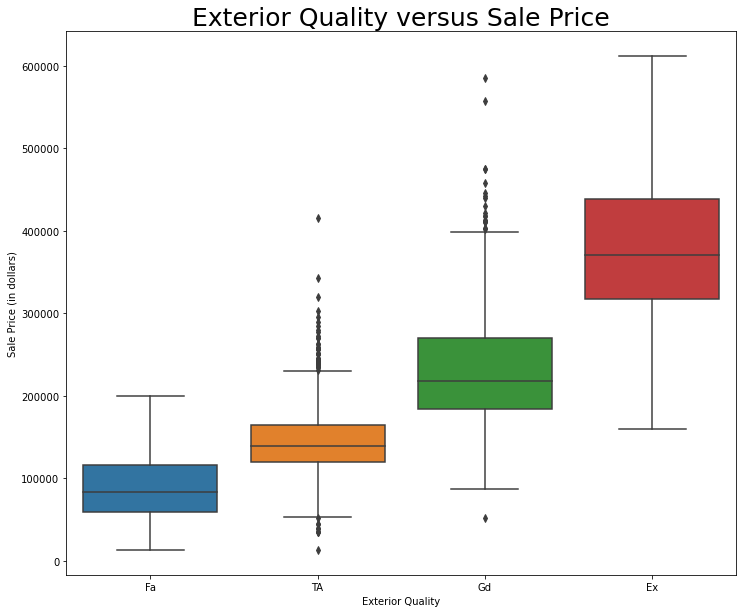

In [37]:
plt.figure(figsize = (12, 10))
sns.boxplot(data = df_least_feat, x = 'exter_qual', y = 'saleprice', order = ['Fa', 'TA', 'Gd', 'Ex'])
plt.title('Exterior Quality versus Sale Price', fontsize = 25)
plt.xlabel('Exterior Quality')
plt.ylabel('Sale Price (in dollars)');

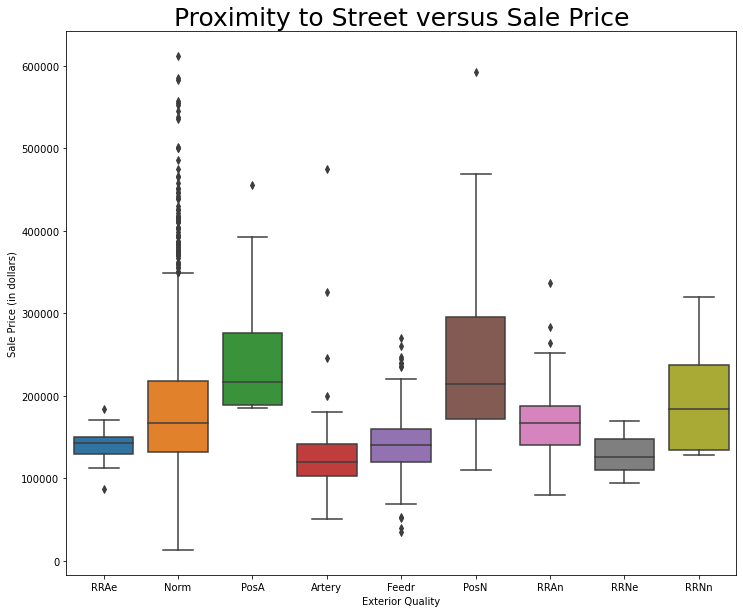

In [34]:
plt.figure(figsize = (12, 10))
sns.boxplot(data = df_least_feat, x = 'condition_1', y = 'saleprice')
plt.title('Proximity to Street versus Sale Price', fontsize = 25)
plt.xlabel('Exterior Quality')
plt.ylabel('Sale Price (in dollars)');

In [30]:
#getting a general idea of null counts
df_least_feat.isnull().sum().sort_values(ascending = False)

bsmt_qual         55
bsmt_cond         55
total_bsmt_sf      1
heating_qc         0
totrms_abvgrd      0
kitchen_qual       0
kitchen_abvgr      0
bedroom_abvgr      0
half_bath          0
full_bath          0
2nd_flr_sf         0
1st_flr_sf         0
lot_area           0
heating            0
utilities          0
exter_cond         0
exter_qual         0
year_remod/add     0
year_built         0
overall_cond       0
overall_qual       0
condition_1        0
saleprice          0
dtype: int64

In [31]:
df_least_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lot_area        2051 non-null   int64  
 1   utilities       2051 non-null   object 
 2   condition_1     2051 non-null   object 
 3   overall_qual    2051 non-null   int64  
 4   overall_cond    2051 non-null   int64  
 5   year_built      2051 non-null   int64  
 6   year_remod/add  2051 non-null   int64  
 7   exter_qual      2051 non-null   object 
 8   exter_cond      2051 non-null   object 
 9   bsmt_qual       1996 non-null   object 
 10  bsmt_cond       1996 non-null   object 
 11  total_bsmt_sf   2050 non-null   float64
 12  heating         2051 non-null   object 
 13  heating_qc      2051 non-null   object 
 14  1st_flr_sf      2051 non-null   int64  
 15  2nd_flr_sf      2051 non-null   int64  
 16  full_bath       2051 non-null   int64  
 17  half_bath       2051 non-null   i

In [32]:
df_least_feat.isna().sum().sort_values(ascending = False)

bsmt_qual         55
bsmt_cond         55
total_bsmt_sf      1
heating_qc         0
totrms_abvgrd      0
kitchen_qual       0
kitchen_abvgr      0
bedroom_abvgr      0
half_bath          0
full_bath          0
2nd_flr_sf         0
1st_flr_sf         0
lot_area           0
heating            0
utilities          0
exter_cond         0
exter_qual         0
year_remod/add     0
year_built         0
overall_cond       0
overall_qual       0
condition_1        0
saleprice          0
dtype: int64

In [33]:
#locating bsmt_qual entries with null values
df_least_feat.loc[(df_least_feat['bsmt_qual'].isna())].head(3)

#the NAs in 'bsmt_qual' and 'bsmt_cond' represent 'no basement'. I can map 'bsmt_qual', 'bsmt_cond' entries on a scale 0 to 5.

,lot_area,utilities,condition_1,overall_qual,overall_cond,year_built,year_remod/add,exter_qual,exter_cond,bsmt_qual,bsmt_cond,total_bsmt_sf,heating,heating_qc,1st_flr_sf,2nd_flr_sf,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,saleprice
12,26400,AllPub,Feedr,5,7,1880,2007,Gd,TA,NaN,NaN,0.0,GasA,Ex,1288,728,1,0,4,1,TA,7,131000
93,7018,AllPub,Norm,5,5,1979,1979,TA,TA,NaN,NaN,0.0,GasA,TA,1535,0,2,0,4,2,TA,8,118858
114,9000,AllPub,Norm,2,2,1947,1950,TA,TA,NaN,NaN,0.0,GasA,Fa,660,0,1,0,2,1,Fa,5,63900


In [34]:
#the entry in 'total_bsmt_sf' can also be zero
df_least_feat.loc[(df_least_feat['total_bsmt_sf'].isna())]

,lot_area,utilities,condition_1,overall_qual,overall_cond,year_built,year_remod/add,exter_qual,exter_cond,bsmt_qual,bsmt_cond,total_bsmt_sf,heating,heating_qc,1st_flr_sf,2nd_flr_sf,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,saleprice
1327,5940,AllPub,Feedr,4,7,1946,1950,TA,TA,NaN,NaN,NaN,GasA,TA,896,0,1,0,2,1,TA,4,79000


In [35]:
df_least_feat.loc[:, df_least_feat.dtypes == 'object']

#exter_qual, exter_cond, bsmt_qual, bsmt_cond, heating_qc, kitchen_qual
#entries can be mapped to a scale 0 to 5.

,utilities,condition_1,exter_qual,exter_cond,bsmt_qual,bsmt_cond,heating,heating_qc,kitchen_qual
0,AllPub,RRAe,Gd,TA,TA,TA,GasA,Ex,Gd
1,AllPub,Norm,Gd,TA,Gd,TA,GasA,Ex,Gd
2,AllPub,Norm,TA,Gd,TA,TA,GasA,TA,Gd
3,AllPub,Norm,TA,TA,Gd,TA,GasA,Gd,TA
4,AllPub,Norm,TA,TA,Fa,Gd,GasA,TA,TA
...,...,...,...,...,...,...,...,...,...
2046,AllPub,Norm,Gd,TA,Gd,TA,GasA,Ex,Gd
2047,AllPub,Norm,TA,TA,TA,TA,GasA,Ex,TA
2048,AllPub,Norm,TA,TA,TA,TA,GasA,Gd,TA
2049,AllPub,Norm,TA,TA,TA,TA,GasA,TA,TA


In [36]:
#Utilities: Type of utilities available
df_least_feat['utilities'].value_counts()

#missing ELO Electricity value in training data, going to binarize

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [37]:
#Condition1: Proximity to main road or railroad
df_least_feat['condition_1'].value_counts()

#all nine values represented in training data

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [38]:
#Heating: Type of heating
df_least_feat['heating'].value_counts()

#missing Floor Floor Furnace value in training data, going to binarize

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: heating, dtype: int64

In [39]:
df_least_feat.columns

Index(['lot_area', 'utilities', 'condition_1', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'exter_qual', 'exter_cond', 'bsmt_qual',
       'bsmt_cond', 'total_bsmt_sf', 'heating', 'heating_qc', '1st_flr_sf',
       '2nd_flr_sf', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'saleprice'],
      dtype='object')

In [40]:
#establishing base age for year_built/'remod/add':
ames_df['year_built'].max()

2010

In [41]:
def pipeline(df):
   #Seting up a cast dictionary for mapping the columns on scale 0 - 5
    cast = {
        'Ex': 5,
        'TA': 3,
        'Gd': 4,
        'Fa': 2,
        'Po': 1,
           0: 0
    }
    
    #Grabbing the columns for transformation
    least_features = ['lot_area', 'utilities', 'condition_1', 'overall_qual',
                'overall_cond', 'year_built', 'year_remod/add', 'exter_qual',
                'exter_cond', 'bsmt_qual', 'bsmt_cond', 'total_bsmt_sf',
                'heating', 'heating_qc', '1st_flr_sf', '2nd_flr_sf',
                'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
                'kitchen_qual', 'totrms_abvgrd']
    
    X = df[least_features]
    
    #filling missing values with '0'
    X.fillna(0, inplace = True)
    
    #columns to binarize:
    X['utilities']      = X['utilities'].map({'AllPub': 1, 'NoSeWa': 0 ,
                                              'NoSewr': 0, 'ELO':0})
    X['heating'] = X['heating'].map({'GasA': 1, 'Floor': 0, 
                                     'GasW': 0 ,'Grav': 0, 
                                     'OthW': 0, 'Wall': 0})

    #extrapolating age from dataset, base max year built houses (2010):
    X['year_built']     = 2010 - X['year_built']
    X['year_remod/add'] = 2010 - X['year_remod/add']
    
    #mapping the cast dict to features scale 0 - 5:
    X['bsmt_qual']      = X['bsmt_qual'].map(cast)
    X['bsmt_cond']      = X['bsmt_cond'].map(cast)
    X['exter_qual']     = X['exter_qual'].map(cast)
    X['exter_cond']     = X['exter_cond'].map(cast)
    X['heating_qc']     = X['heating_qc'].map(cast)
    X['kitchen_qual']   = X['kitchen_qual'].map(cast)
    
    #getting dummies:
    X = pd.get_dummies(X, columns = ['condition_1'], drop_first = True)

    #any feature interactions go here: 
    X['total_sf'] = X['total_bsmt_sf'] + X['1st_flr_sf'] + X['2nd_flr_sf']
    
    return X

In [42]:
df_least_feat = pipeline(df_least_feat)
df_least_feat.head()

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-41-9351429ca34f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['utilities']      = X['utilities'].map({'AllPub': 1, 'NoSeWa': 0 ,
<ipython-input-41-9351429ca34f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,lot_area,utilities,overall_qual,overall_cond,year_built,year_remod/add,exter_qual,exter_cond,bsmt_qual,bsmt_cond,total_bsmt_sf,heating,heating_qc,1st_flr_sf,2nd_flr_sf,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,total_sf
0,13517,1,6,8,34,5,4,3,3,3,725.0,1,5,725,754,2,1,3,1,4,6,0,0,0,0,1,0,0,0,2204.0
1,11492,1,7,5,14,13,4,3,4,3,913.0,1,5,913,1209,2,1,4,1,4,8,0,1,0,0,0,0,0,0,3035.0
2,7922,1,5,7,57,3,3,4,3,3,1057.0,1,3,1057,0,1,0,3,1,4,5,0,1,0,0,0,0,0,0,2114.0
3,9802,1,5,5,4,3,3,3,4,3,384.0,1,4,744,700,2,1,3,1,3,7,0,1,0,0,0,0,0,0,1828.0
4,14235,1,6,8,110,17,3,3,2,4,676.0,1,3,831,614,2,0,3,1,3,6,0,1,0,0,0,0,0,0,2121.0


In [43]:
#adding on the sale price from training data
df_least_feat = df_least_feat.join(ames_df['saleprice'])

In [44]:
df_least_feat.to_csv('./datasets/df_least_feat.csv')

In [45]:
df_least_feat.shape

(2051, 31)

In [46]:
df_least_feat.columns

Index(['lot_area', 'utilities', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond',
       'total_bsmt_sf', 'heating', 'heating_qc', '1st_flr_sf', '2nd_flr_sf',
       'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
       'kitchen_qual', 'totrms_abvgrd', 'condition_1_Feedr',
       'condition_1_Norm', 'condition_1_PosA', 'condition_1_PosN',
       'condition_1_RRAe', 'condition_1_RRAn', 'condition_1_RRNe',
       'condition_1_RRNn', 'total_sf', 'saleprice'],
      dtype='object')

In [47]:
ames_test_df.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New


In [48]:
ames_test_df.shape

(878, 80)

**Modeling Time! Let's Work It!**

In [49]:
features = ['lot_area', 'utilities', 'overall_qual',
                'overall_cond', 'year_built', 'year_remod/add', 'exter_qual',
                'exter_cond', 'bsmt_qual', 'bsmt_cond', 'total_bsmt_sf',
                'heating', 'heating_qc', '1st_flr_sf', '2nd_flr_sf',
                'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
                'kitchen_qual', 'totrms_abvgrd', 'condition_1_Feedr', 
                'condition_1_Norm', 'condition_1_PosA', 'condition_1_PosN',
                'condition_1_RRAe', 'condition_1_RRAn', 'condition_1_RRNe', 
                'condition_1_RRNn']
X = df_least_feat[features]
y = df_least_feat['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
#calling in Linear Regression model:

lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)
lr_1.score(X_train, y_train), lr_1.score(X_test, y_test)

(0.8385407995775148, 0.7542164122898566)

In [51]:
#sorting features by the absolutely size of their coefficient (without respect for positive or negative)
lr_features = pd.DataFrame(X_train.columns, columns = ['feature'])
lr_features['abs_coef'] = np.abs(lr_1.coef_)
lr_features.sort_values(by='abs_coef', ascending = False).head(10)

,feature,abs_coef
24,condition_1_PosN,24354.529883
28,condition_1_RRNn,20091.759276
18,kitchen_abvgr,18551.917439
23,condition_1_PosA,17781.879098
6,exter_qual,13946.587812
2,overall_qual,13729.738390
19,kitchen_qual,13090.249269
8,bsmt_qual,10704.154565
25,condition_1_RRAe,9821.282900
9,bsmt_cond,9810.502537


In [52]:
kaggle_test_df = pipeline(ames_test_df)

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-41-9351429ca34f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['utilities']      = X['utilities'].map({'AllPub': 1, 'NoSeWa': 0 ,
<ipython-input-41-9351429ca34f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [53]:
kaggle_preds = lr_1.predict(kaggle_test_df[features])
kaggle_preds.shape

(878,)

In [59]:
print('Average Expected Housing Price:', kaggle_preds.mean())

Average Expected Housing Price: 178742.08973870758


**Getting Data Ready for Kaggle Submission:**

In [54]:
ames_test_df['saleprice'] = kaggle_preds

In [55]:
ames_test_df.rename(columns={'id':'Id'}, inplace=True)

In [56]:
first_submission = ames_test_df[['Id', 'saleprice']]
first_submission.head()

,Id,saleprice
0,2658,129376.347930
1,2718,180129.880253
2,2414,203084.956848
3,1989,117390.617695
4,625,174946.664469


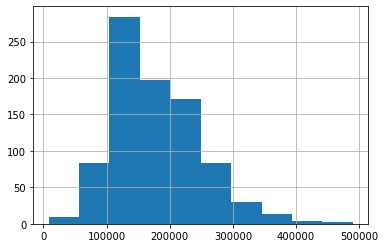

In [57]:
first_submission['saleprice'].hist();

In [58]:
first_submission.set_index('Id', inplace = True)

In [47]:
first_submission.to_csv('./submissions/sec_sub_lr_least_feat.csv')

**Kaggle Score**

- My first submission of a model based on Linear Regression, no scaling, no feature engineering, resulted in a Kaggle score of 32270.01386